In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

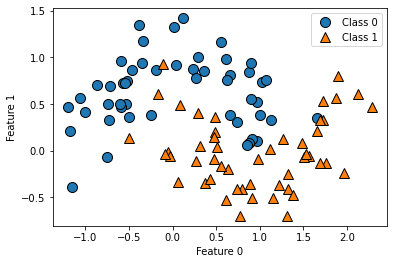

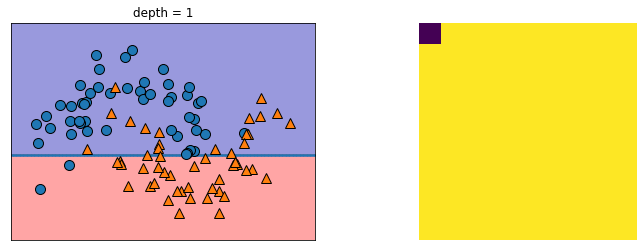

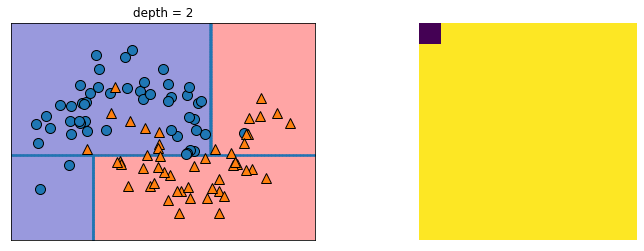

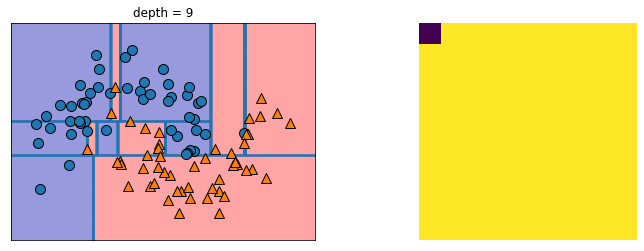

In [5]:
mglearn.plots.plot_tree_progressive()

In [8]:
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.8811188811188811


In [20]:
model=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=5,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)

In [14]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9647887323943662
0.9370629370629371


In [24]:
from sklearn.tree import export_graphviz
import graphviz

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [27]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [32]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [34]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

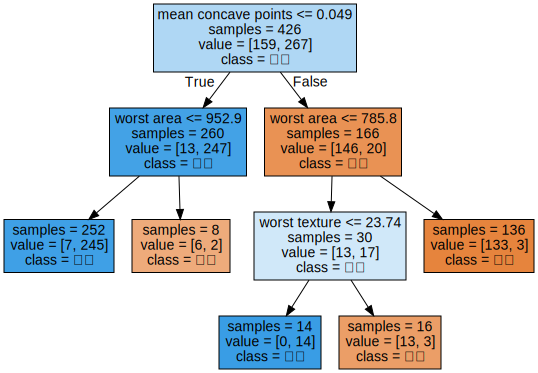

In [35]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [36]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.81084146, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05733052, 0.        , 0.13182801, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [37]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<BarContainer object of 30 artists>

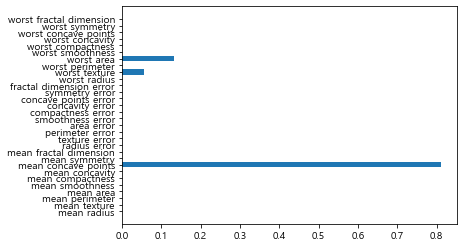

In [46]:
xlabel= cancer["feature_names"]
plt.barh(cancer["feature_names"],model.feature_importances_)

In [ ]:
-------------------------------------------------------------

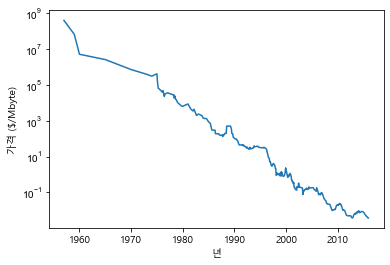

In [47]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [52]:
train= ram_prices[ram_prices["date"]<2000]
test=ram_prices[ram_prices["date"]>=2000]

In [60]:
X_train = train["date"].to_numpy()[:, np.newaxis]
y_train= train["price"].apply(lambda x:np.log(x))

In [59]:
train

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
197,197,1999.50,7.800000e-01
198,198,1999.67,8.700000e-01
199,199,1999.75,1.040000e+00
200,200,1999.83,1.340000e+00


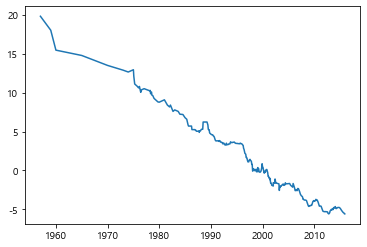

In [62]:
plt.plot(ram_prices["date"], ram_prices["price"].apply(lambda x:np.log(x)))

In [63]:
train["price"].apply(lambda x:np.log(x))

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
197    -0.248461
198    -0.139262
199     0.039221
200     0.292670
201     0.854415
Name: price, Length: 202, dtype: float64

In [65]:
tree_model=DecisionTreeRegressor()
linear_model=LinearRegression()

tree_model.fit(X_train,y_train)
linear_model.fit(X_train,y_train)

LinearRegression()

In [66]:
X=ram_prices["date"].to_numpy()[:,np.newaxis]
y=ram_prices["price"].apply(lambda x:np.log(x))

In [67]:
pred_tree=tree_model.predict(X)
pred_linear=linear_model.predict(X)

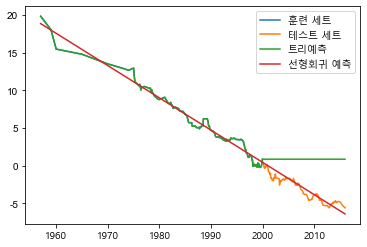

In [71]:
X_test=test["date"].to_numpy()[:,np.newaxis]
y_test=test["price"].apply(lambda x:np.log(x))

plt.yticks(fontname = "Arial")
plt.plot(X_train,y_train,label="훈련 세트")
plt.plot(X_test,y_test,label="테스트 세트")
plt.plot(X,pred_tree, label="트리예측")
plt.plot(X,pred_linear, label="선형회귀 예측")
plt.legend()
plt.show()